In [1]:
import sys
sys.path.append('../')

In [2]:
import minitorch
import minitorch.nn as nn

class MiniTorchModel(nn.Module):
    def __init__(self, in_feat, out_feat):
        super().__init__()
        self.layer1 = nn.Linear(in_feat, 3)
        self.layer2 = nn.Linear(3, out_feat)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

minitorch_model = MiniTorchModel(2, 1)
print(minitorch_model)

print('-'*50)


input_tensor = minitorch.Tensor([[1.0, 1.0]])

out_minitorch = minitorch_model(input_tensor)

print("MiniTorch Model Output:")
print(out_minitorch)

print('-' * 50)

print("MiniTorch Model Parameters:")
for param in minitorch_model.parameters():
    print(param)

print('-' * 50)

MiniTorchModel(
  (layer1): Linear(in_features=2, out_features=3, bias=True),
  (layer2): Linear(in_features=3, out_features=1, bias=True),
)
--------------------------------------------------
MiniTorch Model Output:
tensor([[0.6117]], requires_grad=True)
--------------------------------------------------
MiniTorch Model Parameters:
Parameter containing:
tensor([[-0.5113,  0.0938],
 [-0.6022,  0.4076],
 [ 0.4748, -0.0922]], requires_grad=True)
Parameter containing:
tensor([ 0.0083, -0.5688, -0.1403], requires_grad=True)
Parameter containing:
tensor([[-0.1711,  0.1008,  0.573 ]], requires_grad=True)
Parameter containing:
tensor([0.4798], requires_grad=True)
--------------------------------------------------


In [3]:
from minitorch.nn import Linear, Module
from minitorch import Tensor
from minitorch.nn.parameter import Parameter

class MiniTorchModel(Module):
    def __init__(self, in_feat, out_feat):
        super().__init__()
        self.layer1 = Linear(in_feat, 3)
        self.layer2 = Linear(3, out_feat)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

minitorch_model = MiniTorchModel(2, 1)
print(minitorch_model)

print(minitorch_model.layer1.weight)
print(minitorch_model.layer1.bias)

print(minitorch_model.layer2.weight)
print(minitorch_model.layer2.bias)


MiniTorchModel(
  (layer1): Linear(in_features=2, out_features=3, bias=True),
  (layer2): Linear(in_features=3, out_features=1, bias=True),
)
Parameter containing:
tensor([[ 0.0536, -0.4713],
 [-0.5774, -0.3284],
 [-0.4247, -0.4528]], requires_grad=True)
Parameter containing:
tensor([ 0.4308, -0.0148, -0.4215], requires_grad=True)
Parameter containing:
tensor([[-0.0703,  0.3695, -0.3965]], requires_grad=True)
Parameter containing:
tensor([0.4007], requires_grad=True)


In [4]:
print(minitorch_model.parameters())

print('-' * 50)

print(minitorch_model.parameters)
print(minitorch_model.zero_grad())

print(minitorch_model.layer1.weight.grad)

[Parameter containing:
tensor([[ 0.0536, -0.4713],
 [-0.5774, -0.3284],
 [-0.4247, -0.4528]], requires_grad=True), Parameter containing:
tensor([ 0.4308, -0.0148, -0.4215], requires_grad=True), Parameter containing:
tensor([[-0.0703,  0.3695, -0.3965]], requires_grad=True), Parameter containing:
tensor([0.4007], requires_grad=True)]
--------------------------------------------------
<bound method Module.parameters of MiniTorchModel(
  (layer1): Linear(in_features=2, out_features=3, bias=True),
  (layer2): Linear(in_features=3, out_features=1, bias=True),
)>
None
tensor(0.)


In [5]:
import torch
import torch.nn as nn

class TorchModel(nn.Module):
    def __init__(self, in_feat, out_feat):
        super().__init__()
        self.layer1 = nn.Linear(in_feat, 3)
        self.layer2 = nn.Linear(3, out_feat)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

torch_model = TorchModel(2, 1)
out_torch = torch_model(torch.tensor([[1.0] * 2]))


print(torch_model)
print('-' * 50)


print("Torch Model Output:")
print(out_torch)

print('-'*50)

print("Torch Model Parameters:")
for param in torch_model.parameters():
    print(param)

print('-'*50)

t = torch.tensor([[1.0] * 2])
print(t)
print(t.grad)
print(t.requires_grad)

z = torch.tensor([[1.0] * 2], requires_grad=True)
print(z)

# p = torch.nn.Parameter(1.0)
# print(p)

TorchModel(
  (layer1): Linear(in_features=2, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=1, bias=True)
)
--------------------------------------------------
Torch Model Output:
tensor([[0.9091]], grad_fn=<AddmmBackward0>)
--------------------------------------------------
Torch Model Parameters:
Parameter containing:
tensor([[ 0.5151,  0.5436],
        [-0.0316, -0.3202],
        [-0.3345, -0.6999]], requires_grad=True)
Parameter containing:
tensor([-0.4621, -0.2433, -0.5120], requires_grad=True)
Parameter containing:
tensor([[-0.0565, -0.5593, -0.0996]], requires_grad=True)
Parameter containing:
tensor([0.4560], requires_grad=True)
--------------------------------------------------
tensor([[1., 1.]])
None
False
tensor([[1., 1.]], requires_grad=True)


MiniTorchModel(
  (layer1): Linear(in_features=2, out_features=1, bias=True),
)
Parameter containing:
tensor([[-0.2347, -0.5003]], requires_grad=True)
Parameter containing:
tensor([-0.3827], requires_grad=True)


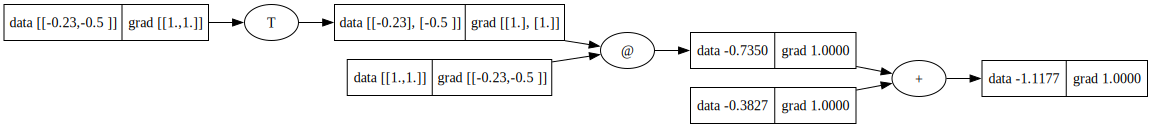

In [6]:
import minitorch
import minitorch.nn as nn

class MiniTorchModel(nn.Module):
    def __init__(self, in_feat, out_feat):
        super().__init__()
        self.layer1 = nn.Linear(in_feat, out_feat)

    def forward(self, x):
        x = self.layer1(x)
        return x

minitorch_model = MiniTorchModel(2, 1)
print(minitorch_model)

print(nn.Parameter(minitorch_model.layer1.weight))
print(nn.Parameter(minitorch_model.layer1.bias))

input_tensor = minitorch.Tensor([[1.0, 1.0]])
y=minitorch_model(input_tensor)

y.backward()

from minitorch.viz import draw_dot
from IPython.display import display, SVG

# Visualize
dot = draw_dot(y, format='svg')
display(SVG(dot.pipe(format='svg')))


In [7]:
from minitorch.nn.parameter import Parameter
from minitorch.optim import SGD


# Dummy example
w = Parameter(1.0)  # Initial value
w.grad = 0.1        # gradient

opt = SGD([w], lr=0.01)
opt.step()
print(w.data)  # Should be 1.0 - 0.01 * 0.1 = 0.999


0.999


In [8]:
from minitorch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys

    def __getitem__(self, idx):
        return self.xs[idx], self.ys[idx]

    def __len__(self):
        return len(self.xs)

# Dummy data
xs = [i for i in range(10)]
ys = [2 * i + 1 for i in range(10)]


dataset = MyDataset(xs, ys)
print("Dataset length:", len(dataset))
print(dataset)

loader = DataLoader(dataset, batch_size=3, shuffle=True)
print("DataLoader length:", len(loader))
print(loader)

for xb, yb in loader:
    print("Batch x:", list(xb))
    print("Batch y:", list(yb))


Dataset length: 10
Dataset(10)
DataLoader length: 4
DataLoader(batch_size=3, shuffle=True, dataset_size=10)
Batch x: [5, 6, 0]
Batch y: [11, 13, 1]
Batch x: [7, 4, 1]
Batch y: [15, 9, 3]
Batch x: [3, 8, 9]
Batch y: [7, 17, 19]
Batch x: [2]
Batch y: [5]


In [9]:
import minitorch
from minitorch.nn.parameter import Parameter
from minitorch.optim import SGD

# Single-variable linear regression: y = wx + b
w = Parameter(Tensor([0.0]))
b = Parameter(Tensor([0.0]))

def predict(x):
    return w.data * x + b.data

def compute_loss(y_pred, y_true):
    return (y_pred - y_true) ** 2

optimizer = SGD([w, b], lr=0.01)

for epoch in range(10):
    total_loss = 0.0
    for x_batch, y_batch in loader:
        for x, y in zip(x_batch, y_batch):
            x = Tensor(x)
            y = Tensor(y)
            y_pred = predict(x)
            loss = compute_loss(y_pred, y)

            # Manual "backward"
            grad_y_pred = 2.0 * (y_pred - y)
            w.grad = grad_y_pred * x
            b.grad = grad_y_pred * 1.0

            optimizer.step()
            optimizer.zero_grad()

            total_loss += loss.item()
    total_loss /= len(loader)

    print(f"Epoch {epoch+1}: Loss = {total_loss.item():.4f}")


Epoch 1: Loss = 77.6438
Epoch 2: Loss = 0.4569
Epoch 3: Loss = 0.3479
Epoch 4: Loss = 0.2892
Epoch 5: Loss = 0.2655
Epoch 6: Loss = 0.2955
Epoch 7: Loss = 0.2698
Epoch 8: Loss = 0.2145
Epoch 9: Loss = 0.1924
Epoch 10: Loss = 0.1675


In [10]:
import minitorch.nn as nn

class NN(nn.Module):
    def __init__(self, in_feat, out_feat):
        super().__init__()
        self.layer1 = nn.Linear(in_feat, 3)
        self.sign = nn.Sigmoid()
        self.layer2 = nn.Linear(3, out_feat)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.layer1(x)
        x = self.sign(x)
        x = self.layer2(x)
        x = self.relu(x)
        return x
    
minitorch_model = NN(2, 1)
print(minitorch_model)

NN(
  (layer1): Linear(in_features=2, out_features=3, bias=True),
  (sign): Sigmoid(),
  (layer2): Linear(in_features=3, out_features=1, bias=True),
  (relu): ReLU(),
)
